# DATA PREPROCESSING

### **Importing necessary python libraries**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the data set**

In [90]:
# Making data frame from insurance.csv data set
insurance_dataframe=pd.read_csv('Data Set\insurance.csv')

In [91]:
#Overview on dataset
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [92]:
#printing 1st five rows of dataset
insurance_dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [93]:
#printing last five rows of dataset
insurance_dataframe.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [94]:
#printing the shape of dataset
insurance_dataframe.shape

(1338, 7)

In [95]:
#printing the info about dataset
insurance_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [96]:
#description about the dataset
insurance_dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [97]:
# To check if any null values exist
insurance_dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<div> So there are no NAN values in any of the row of the the dataset</div>

### Encoding the categorial values

*Label Encoding* :- Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project. In the given dataset columns like sex,region,smoke are not numerical values. So they needed to be encoded into numeric values with label encoder. Here we use normal "Label encoder" instead of "one hot encoder".

In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

# encoding feature "sex" into numeric values
label_encoder.fit(insurance_dataframe.sex.drop_duplicates())
insurance_dataframe.sex=label_encoder.transform(insurance_dataframe.sex)

# encoding feature "smoker" into numeric values
label_encoder.fit(insurance_dataframe.smoker.drop_duplicates())
insurance_dataframe.smoker=label_encoder.transform(insurance_dataframe.smoker)

# encoding feature "region" into numeric values
label_encoder.fit(insurance_dataframe.region.drop_duplicates())
insurance_dataframe.region=label_encoder.transform(insurance_dataframe.region)

In [99]:
#printing the new encoded dataset
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# EXPLORATORY DATA ANALYSIS

### Correlation

correlation :-Correlation analysis is a statistical technique for determining the strength of a link between two variables. It is used to detect patterns and trends in data and to forecast future occurrences.


  <blockquote>
  <ol>

  <li>
  
  Positive Correlation: Positive correlation indicates that two variables have a direct relationship. As one variable increases, the other variable also increases. For example, there is a positive correlation between height and weight. As people get taller, they also tend to weigh more.

  </li>


  <li>
  
  Negative Correlation: Negative correlation indicates that two variables have an inverse relationship. As one variable increases, the other variable decreases. For example, there is a negative correlation between price and demand. As the price of a product increases, the demand for that product decreases.

  </li>

  
  <li>
  
  Zero Correlation: Zero correlation indicates that there is no relationship between two variables. The changes in one variable do not affect the other variable. For example, there is zero correlation between shoe size and intelligence.
  
  </li>
  </ol>
  
  </blockquote>

In [100]:
#printing correlation of all features of the dataset
insurance_dataframe.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [101]:
# we need correlation with "charges" feature 
insurance_dataframe.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

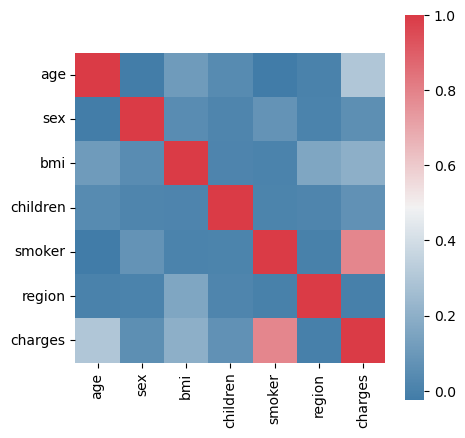

In [102]:
# printing the heat map which shows the total correlation in a graphical form
f,ax=plt.subplots(figsize=(5,5))
correlation=insurance_dataframe.corr()
sns.heatmap(correlation,mask=np.zeros_like(correlation),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,ax=ax)

Here based upon heatmap we can say there is a very high corelation between "charges"(target variable) and feature "smoker". Also features like age,bmi,children,sex shown positive correlation with "charges" in decreasing order.

### **Now let us see the distribution of various features**

#### **Distribution of Charges** 

Text(0.5, 1.0, 'Distribution of Charges')

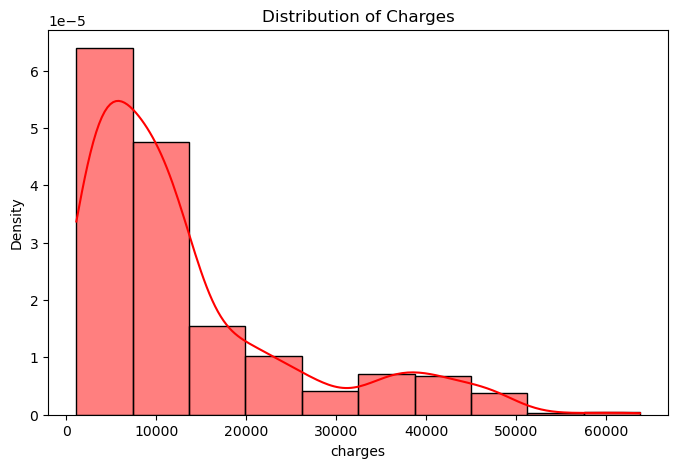

In [103]:

# Plot the distribution of charges
f=plt.figure(figsize=(8,5))
sns.histplot(insurance_dataframe["charges"],stat='density',color='r',kde=True,bins=10)
plt.title('Distribution of Charges')


#### **Distribution of charges for smokers and non-smokers**

Text(0.5, 1.0, 'Distribution of Charges for Non-Smokers')

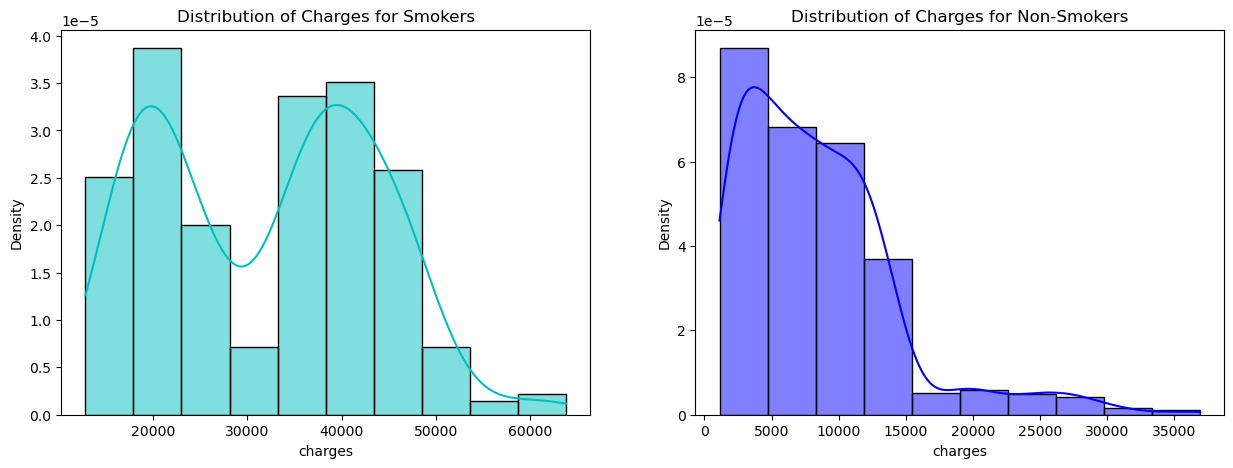

In [104]:
f=plt.figure(figsize=(15,5))# making a plot for figure with chosen width and height
ax=f.add_subplot(121) # or we can write it as add_subplot(1,2,1) and gives the axis
# refer to matlab subplot page to know about subplot(m,n,p)
sns.histplot(insurance_dataframe[(insurance_dataframe.smoker==1)]["charges"],kde=True,color='c',stat='density',bins=10,ax=ax)

# kde is kernal density estimate is the curve in the figure which gives a smooth distribution .
# stat=density which normalize such that the total area of the histogram equals 1
# bins will control the number of rectangular hist displayed
# ax refers to axis
# hue refers to Semantic variable that is mapped to determine the color of plot elements.

ax.set_title("Distribution of Charges for Smokers") #set the title to axes

ax=f.add_subplot(122)
sns.histplot(insurance_dataframe[(insurance_dataframe.smoker==0)]["charges"],kde=True,color='b',stat='density',bins=10,ax=ax)
ax.set_title("Distribution of Charges for Non-Smokers")


#### Hence smoking patients pay more on treatment than non-smokers. Let us check number of smokers and non smokers 

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


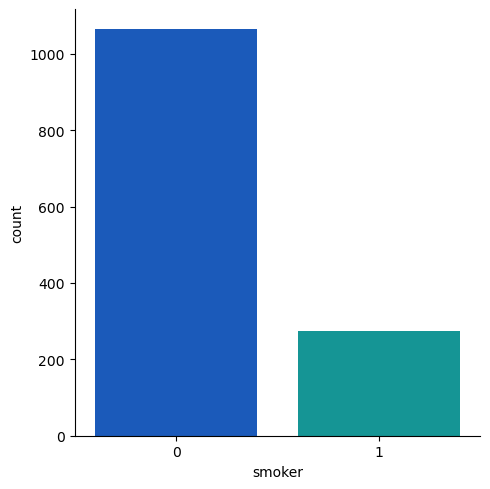

In [105]:
sns.catplot(x="smoker",data=insurance_dataframe,kind="count",palette="winter") 


#### here obviously non smokers are more than smokers

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


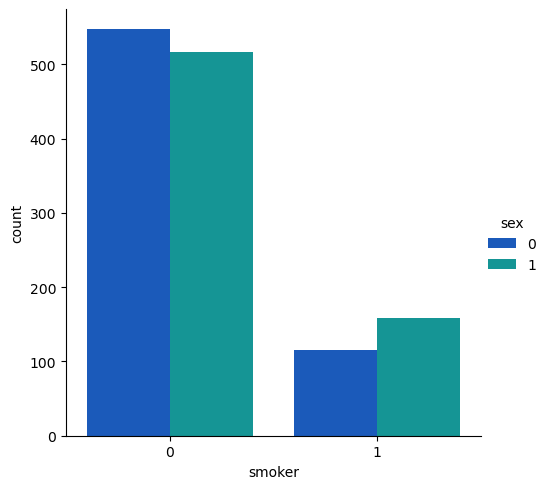

In [106]:
#sea born has catplot which helps to print different types of plot
# sns.catplot(x="smoker",data=insurance_dataframe,kind="count") this will print count of smokers and non smokers
sns.catplot(x="smoker",data=insurance_dataframe,kind="count",hue="sex",palette="winter") 

##### Here female are encoded with 0(blue ) and males are encoded with 1 (green). And these are the following conclusions :
##### Among non smokers females are more in number and among smokers male are more in number

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


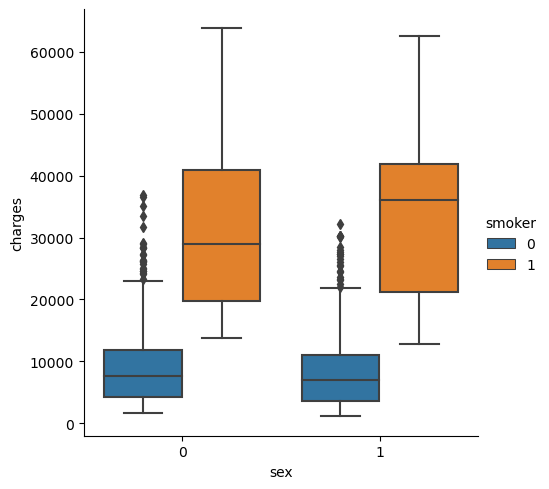

In [107]:
#box plot are one of the type of plot which give lot of details about outliers,median and skewness
sns.catplot(x="sex",y="charges",data=insurance_dataframe,kind="box",hue="smoker")

##### if the median(centeral line box) is near to lower quartile of box it is positively skewed otherwise negatively skewed

Text(0.5, 1.0, 'distribution of charges among smokers in both genders')

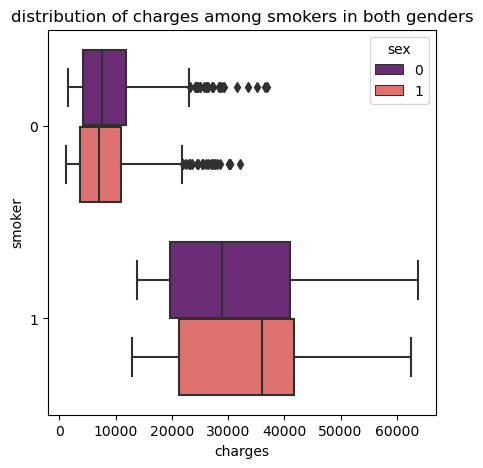

In [108]:
plt.figure(figsize=(5,5))
sns.boxplot(x="charges",y="smoker",data=insurance_dataframe,orient="h",hue="sex",palette="magma")
plt.title("distribution of charges among smokers in both genders")

#### Now we will look at age  distribution

<Axes: xlabel='age', ylabel='Count'>

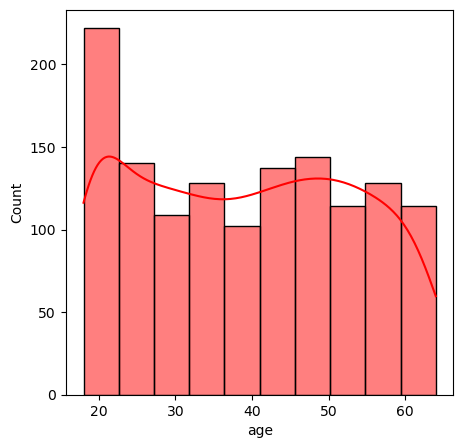

In [109]:
plt.figure(figsize=(5,5))
sns.histplot(x="age",data=insurance_dataframe,kde=True,color='r',bins=10)

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distributon of smokers who are of age 18')

<Figure size 500x500 with 0 Axes>

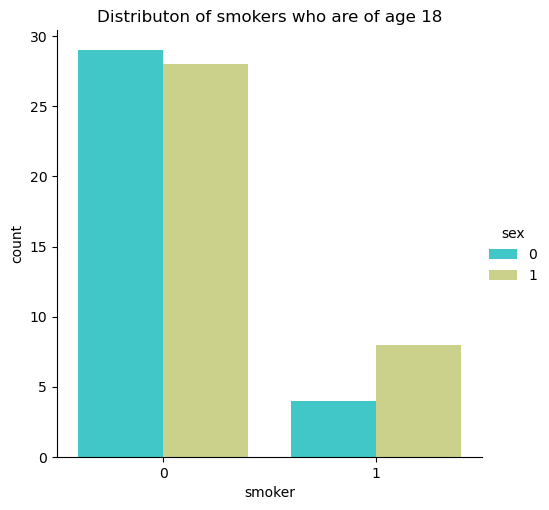

In [110]:
plt.figure(figsize=(5,5))
sns.catplot(x="smoker",data=insurance_dataframe[(insurance_dataframe.age==18)],kind="count",hue="sex",palette="rainbow")
plt.title("Distributon of smokers who are of age 18")

### Does smoking at 18 affects their charges for isurance ? lets find out

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, ' Charges for smokers whose age is 18')

<Figure size 500x500 with 0 Axes>

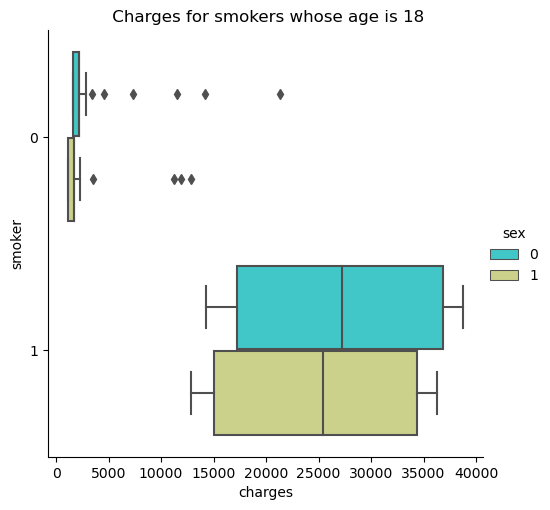

In [111]:
plt.figure(figsize=(5,5))
sns.catplot(x="charges",y="smoker",data=insurance_dataframe[(insurance_dataframe.age)==18],kind="box",hue="sex",orient="h",palette="rainbow")
plt.title(" Charges for smokers whose age is 18")

#### Hence female smokers who are 18, spend more charges than male who are 18

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Smokers and non-smokers')

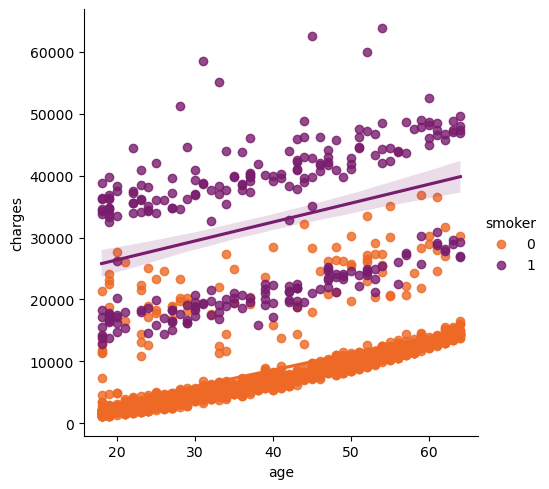

In [112]:
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance_dataframe, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

### Now let us analyze based on bmi

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


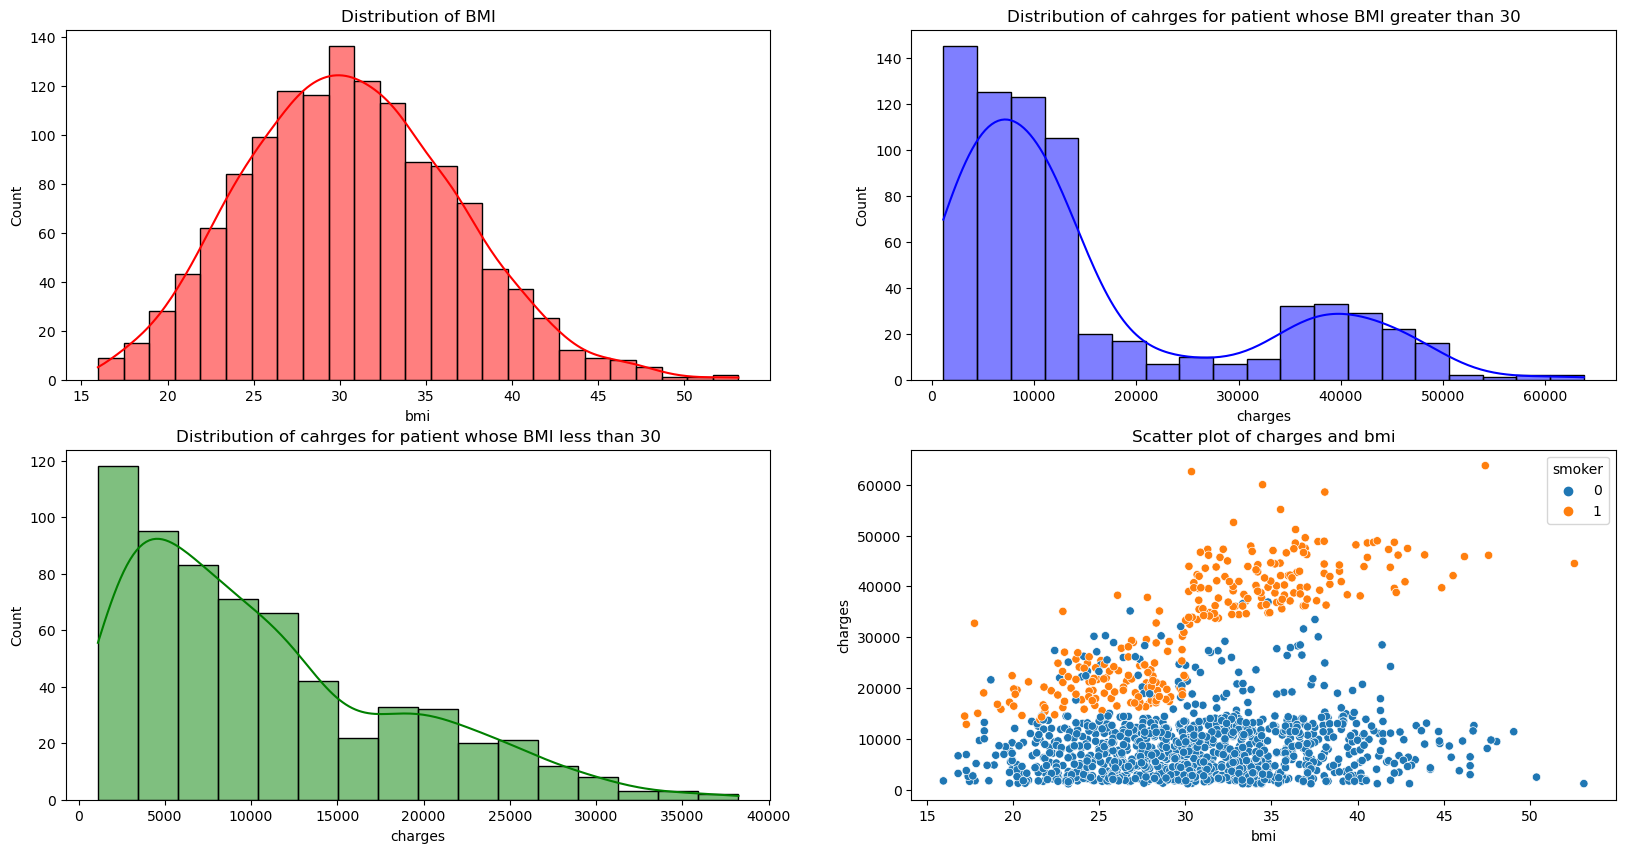

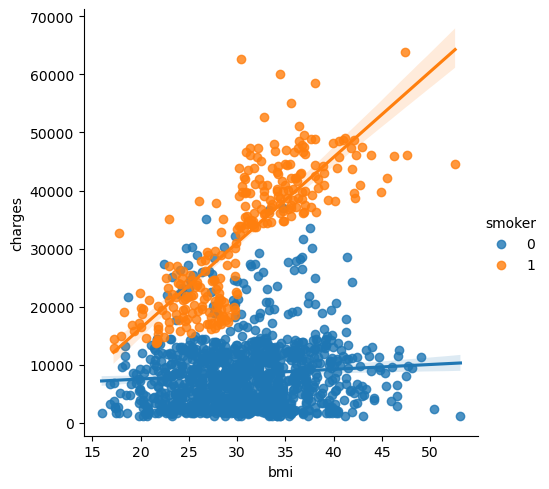

In [113]:
f=plt.figure(figsize=(20,10))
ax=f.add_subplot(221)
sns.histplot(insurance_dataframe["bmi"],stat="count",kde=True,ax=ax,color='r')
ax.set_title("Distribution of BMI")

ax=f.add_subplot(222)
sns.histplot(insurance_dataframe[(insurance_dataframe.bmi)>=30]["charges"],stat="count",kde=True,ax=ax,color='b')
ax.set_title("Distribution of cahrges for patient whose BMI greater than 30")

ax=f.add_subplot(223)
sns.histplot(insurance_dataframe[(insurance_dataframe.bmi)<30]["charges"],stat="count",kde=True,ax=ax,color='g')
ax.set_title("Distribution of cahrges for patient whose BMI less than 30")

ax=f.add_subplot(224)
sns.scatterplot(x="bmi",y="charges",data=insurance_dataframe,hue="smoker",ax=ax)
ax.set_title("Scatter plot of charges and bmi")

sns.lmplot(x="bmi",y="charges",data=insurance_dataframe,hue="smoker")


### Now let us analyze based on children

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of children')

<Figure size 200x200 with 0 Axes>

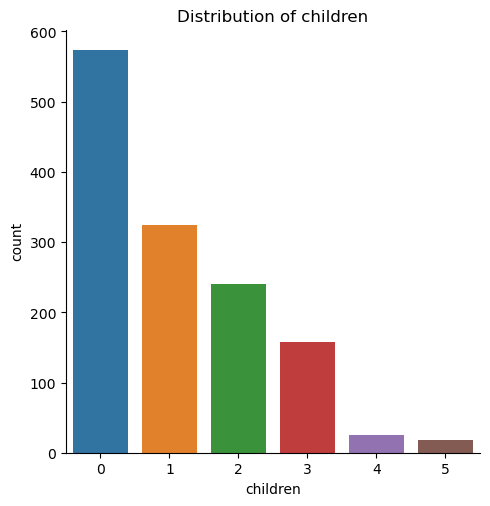

In [114]:
plt.figure(figsize=(2,2))
sns.catplot(x="children",kind="count",data=insurance_dataframe)
plt.title("Distribution of children")

c:\Users\Bhavesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of smokers who have children')

<Figure size 200x200 with 0 Axes>

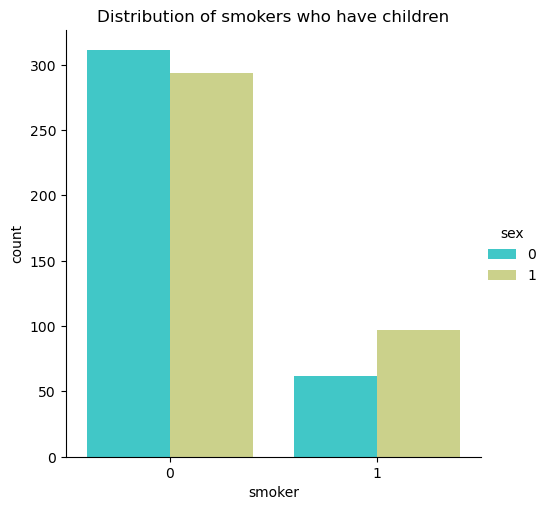

In [115]:
plt.figure(figsize=(2,2))
sns.catplot(x="smoker",kind="count",data=insurance_dataframe[(insurance_dataframe).children>0],hue="sex",palette="rainbow")
plt.title("Distribution of smokers who have children")

#### Here non smoking parents much more than smoking parents.But there are some parents who smoke

# **Training Model**

In [116]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [117]:
x=insurance_dataframe.drop(['charges'],axis=1)
y=insurance_dataframe.charges
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [118]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [120]:
x_train

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [121]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [122]:
x_test

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1
726,41,1,28.405,1,0,1
1132,57,1,40.280,0,0,0
725,30,0,39.050,3,1,2


In [123]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

In [124]:
lr=LinearRegression().fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)
print("Accuracy of model for training data : ",lr.score(x_train,y_train))
print("Accuracy of model for testing  data : ",lr.score(x_test,y_test))

Accuracy of model for training data :  0.7368306228430945
Accuracy of model for testing  data :  0.7998747145449959


In [126]:
import pickle
pickle_out=open("linear_regression.pkl","wb")
pickle.dump(lr,pickle_out)
pickle_out.close()